1. The Neatest Little Guide to Stock Market Investing
2. Investing For Dummies, 4th Edition
3. The Little Book of Common Sense Investing: The Only Way to Guarantee Your Fair Share of Stock Market Returns
4. The Little Book of Value Investing
5. Value Investing: From Graham to Buffett and Beyond
6. Rich Dad's Guide to Investing: What the Rich Invest in, That the Poor and the Middle Class Do Not!
7. Investing in Real Estate, 5th Edition
8. Stock Investing For Dummies
9. Rich Dad's Advisors: The ABC's of Real Estate Investing: The Secrets of Finding Hidden Profits Most Investors Miss

In [207]:
%pylab inline
from numpy import zeros
from scipy.linalg import svd
#following needed for TFIDF
from math import log
from numpy import asarray, sum
import matplotlib.pyplot as plt 

titles = ["The Neatest Little Guide to Stock Market Investing",
          "Investing For Dummies, 4th Edition",
          "The Little Book of Common Sense Investing: The Only Way to Guarantee Your Fair Share of Stock Market Returns",
          "The Little Book of Value Investing",
          "Value Investing: From Graham to Buffett and Beyond",
          "Rich Dad's Guide to Investing: What the Rich Invest in, That the Poor and the Middle Class Do Not!",
          "Investing in Real Estate, 5th Edition",
          "Stock Investing For Dummies",
          "Rich Dad's Advisors: The ABC's of Real Estate Investing: The Secrets of Finding Hidden Profits Most Investors Miss"
          ]
stopwords = ['and','edition','for','in','little','of','the','to']
ignorechars = ''',:'!'''

class LSA(object):
    def __init__(self, stopwords, ignorechars):
        self.stopwords = stopwords
        self.ignorechars = ignorechars
        self.wdict = {}
        self.dcount = 0        
    def parse(self, doc):
        words = doc.split();
        for w in words:
            w = w.lower().translate(None, self.ignorechars)
            if w in self.stopwords:
                continue
            elif w in self.wdict:
                self.wdict[w].append(self.dcount)
            else:
                #考虑wdict['book']会不会出现[0,0]如果book在0中出现两次
                self.wdict[w] = [self.dcount]
        self.dcount += 1      
    def build(self):
        self.keys = [k for k in self.wdict.keys() if len(self.wdict[k]) > 1]
        self.keys.sort()
        self.A = zeros([len(self.keys), self.dcount])
        for i, k in enumerate(self.keys):
            for d in self.wdict[k]:
                self.A[i,d] += 1
    def calc(self):
        self.U, self.S, self.Vt = svd(self.A)
        
    def picture0(self):
        '''
        根据奇异值的平方画出奇异值的重要性的bar图
        '''
        plt.bar(left=range(len(self.S)) ,height=(self.S**2)/sum(self.S**2),align="center")
        plt.xticks(range(len(self.S)))
        plt.title("The Importance of Each Singular Value")
        plt.xlabel(u"Singular Values")
        plt.ylabel(u"Importance")
    def picture1(self):
        '''
        画出瓦片图
        '''
        plt.set_cmap('bwr') 
        plt.pcolor(-1*self.Vt[0:3,:])
        plt.colorbar()
        plt.yticks(np.arange(3)+0.5,['Dim1','Dim2','Dim3',])
        plt.xticks(np.arange(9)+0.5,[i[0]+i[1] for i in zip(['T']*9 ,map(str,range(1,10)))])
        plt.gca().invert_yaxis()
        plt.gca().set_aspect('equal')
        plt.xlabel("Book Titles")
        plt.ylabel("Dimensions")
        plt.title("Top 3 Dimensions of Each Book Title")
    
    def picture2(self):
        '''
        画出散点图加上点的注释，投影到概念空间
        '''
        TitleX = -1*self.Vt[1,:]
        TitleY = -1*self.Vt[2,:]
        WordX = -1*self.U[:,1]
        WordY = -1*self.U[:,2]
        
        #画Word图的形状和注释
        Words = self.keys
        plt.plot(WordX,WordY,'rs')
        for i in range(len(Words)):
            plt.annotate(Words[i],xy=(WordX[i],WordY[i]),xytext=(2, 6),textcoords='offset points',color='red')
        #画Title图的形状和注释
        Titles = [i[0]+i[1] for i in zip(['T']*9 ,map(str,range(1,10)))]
        plt.plot(TitleX,TitleY,'bo')
        for i in range(len(TitleX)):
            plt.annotate(Titles[i],xy=(TitleX[i],TitleY[i]),xytext=(2, 2),textcoords='offset points',color='blue')
        plt.title('XY plots of Words and Titles')
        plt.xlabel('Dimension 2')
        plt.ylabel('Dimension 1')
        
    def TFIDF(self):
        WordsPerDoc = sum(self.A, axis=0)        
        DocsPerWord = sum(asarray(self.A > 0, 'i'), axis=1)
        rows, cols = self.A.shape
        for i in range(rows):
            for j in range(cols):
                self.A[i,j] = (self.A[i,j] / WordsPerDoc[j]) * log(float(cols) / DocsPerWord[i])

    def printA(self):
        print 'Here is the count matrix'
        print self.A
    def printSVD(self):
        print 'Here are the singular values'
        print self.S
        print 'Here are the first 3 columns of the U matrix'
        print -1*self.U[:, 0:3]
        print 'Here are the first 3 rows of the Vt matrix'
        print -1*self.Vt[0:3, :]

mylsa = LSA(stopwords, ignorechars)
for t in titles:
    mylsa.parse(t)
mylsa.build()
mylsa.printA()
mylsa.calc()
mylsa.printSVD()
plt.figure(1)
mylsa.picture1()
plt.figure(2)
mylsa.picture2()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [209]:
mylsa = LSA(stopwords, ignorechars)
for t in titles:
    mylsa.parse(t)
mylsa.build()
mylsa.printA()
mylsa.calc()
mylsa.printSVD()

Here is the count matrix
[[ 0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.]]
Here are the singular values
[ 3.90941804  2.60911881  1.99682784  1.68702498  1.54678536  1.04451835
  0.59375541  0.41040138  0.26652691]
Here are the first 3 columns of the U matrix
[[ 0.15283556 -0.26603445  0.04450319]
 [ 0.23746367  0.37826282 -0.08595889]
 [ 0.13026538 -0.17428415  0.06901432]
 [ 0.18440432  0.1939483   0.44568964]
 [ 0.2161232   0.08727248 -0.46011902]
 [ 0.74009654 -0.21114703  0.21075317]
 [ 0.17687585 -0.29791161 -0.28320277]
 [ 0.18440432  0.1939483   0.44568964]
 [ 0.3630785   0.58854128 -0.34119818]
 [ 0.2501

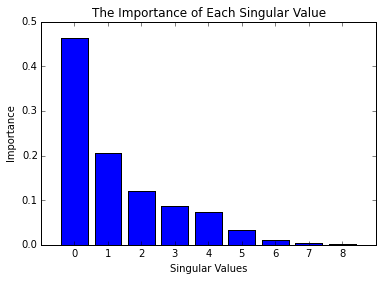

In [211]:
mylsa.picture0()

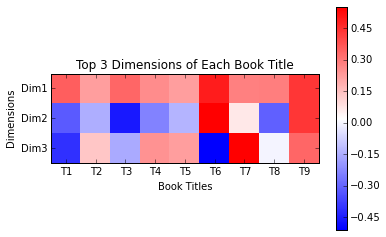

In [205]:
mylsa.picture1()

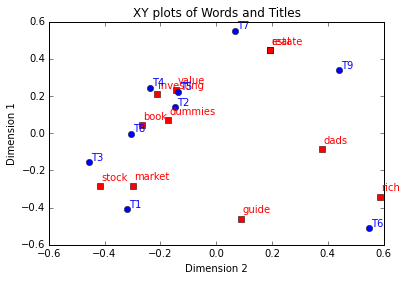

In [210]:
mylsa.picture2()